In [20]:
import numpy as np
from shapely.geometry.polygon import LinearRing, Polygon
from shapely.geometry import Point
import random
from shapely import affinity
import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
class Room():        
    def __init__(self, shape):
        self.shape = shape
        self.polygon = Polygon(np.array(shape, dtype=np.float64))

In [22]:
class FurnitureItem(): 
    def __init__(self, unitcost, shape):
        self.shape = shape
        self.unit_cost = unitcost
        self.polygon = Polygon(np.array(shape, dtype=np.float64))
        self.total_cost = np.float64((np.float64(self.unit_cost) * self.polygon.area))

In [23]:
class Problem():
    def __init__(self, room, furniture):
        self.room = room
        self.furniture = furniture

In [24]:
problems = []
with open('problems.rfp') as f:
    for line in f:
        furnitureList = []
        problem = line.replace(" ","").split("#")

        room_shape = problem[0].split(":")[1]
        furniture = problem[1].split(";")

        room = Room([tuple(np.float64(i) for i in el.strip('()').split(',')) for el in room_shape.split('),(')])

        for furnitureItem in furniture:
            parse_furniture = furnitureItem.strip().split(":")
            unit_cost = parse_furniture[0]
            shape = [tuple(np.float64(i) for i in el.strip('()').split(',')) for el in parse_furniture[1].split('),(')]
            furnitureItem = FurnitureItem(unit_cost, shape)
            furnitureList.append(furnitureItem)
        problems.append(Problem(room,furnitureList))

In [25]:
def plot(poly):
    x,y = poly.exterior.xy
    plt.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    plt.show()

In [26]:
len(problems[0].furniture)

94

In [191]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)
    return points

In [243]:
solution = []
room_2 = problems[17].room.polygon
shapes = copy.copy(problems[17].furniture)
initial_area = room_2.area
while ((initial_area-room_2.area)/initial_area) < 0.3:
    for j in shapes:
        points = random_points_within(room_2,1)[0]
        polygon = affinity.translate(j.polygon, points.x, points.y)
        polygon = affinity.rotate(polygon, random.uniform(0,90),origin="centroid")
        if room_2.contains(polygon):
            room_2 = room_2.difference(polygon)
            x,y = polygon.exterior.xy
            solution.append(list(zip(*(x,y))))
            shapes.remove(j)
            print(len(shapes), (initial_area-room_2.area)/initial_area)
room_2.area

380 0.0136986301369863
379 0.0273972602739726
378 0.0410958904109589
377 0.0547945205479452
376 0.0625
375 0.0761986301369863
374 0.0898972602739726
373 0.1035958904109589
372 0.1113013698630137
371 0.1190068493150685
370 0.1267123287671233
369 0.1404109589041096
368 0.1541095890410959
367 0.1618150684931507
366 0.175513698630137
365 0.1832191780821918
364 0.1909246575342466
363 0.19863013698630136
362 0.20633561643835616
361 0.21404109589041095
360 0.22174657534246575
359 0.22945205479452055
358 0.23715753424657535
357 0.24486301369863014
356 0.2525684931506849
355 0.2602739726027397
354 0.2679794520547945
353 0.2756849315068493
352 0.2833904109589041
351 0.2910958904109589
350 0.2988013698630137
349 0.3065068493150685


50.625

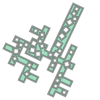

In [244]:
room_2

In [245]:
output = ""
for x in solution:
    output = output + str(x[:-1]).replace('[','').replace(']','') + "; "
print(output)

(3.2756321131573776, 4.502368261578857), (3.91233520925436, 3.7312592113009364), (4.683444259532281, 4.36796230739792), (4.046741163435298, 5.13907135767584); (3.6428332515336668, 1.1211643258461086), (2.828265223367413, 1.7012323627946557), (2.2481971864188655, 0.8866643346284024), (3.062765214585119, 0.3065962976798551); (4.712575635659002, 7.162013926456454), (5.216208416915284, 6.298096093763979), (6.080126249607758, 6.801728875020262), (5.576493468351476, 7.665646707712736); (2.6632813497848202, 2.709028640506258), (3.5280918752491863, 2.20693028854118), (4.030190227214263, 3.0717408140055467), (3.165379701749897, 3.5738391659706243); (0.5206072002118947, 3.0724375072145556), (-0.17525851483357968, 2.7926681260731407), (0.10451086630783513, 2.0968024110276664), (0.8003765813533097, 2.376571792169081); (-0.5078729682557921, 3.3196702868220362), (-1.4029933855254038, 3.7654947349931485), (-1.848817833696516, 2.8703743177235364), (-0.9536974164269043, 2.424549869552425); (5.495668782